In [1]:
#128 bins below 0
#128 bins above 0
#1 bin below -1
#1 bin above 1
bins = [i / 128 for i in range(-128, 129)]
print(bins)

[-1.0, -0.9921875, -0.984375, -0.9765625, -0.96875, -0.9609375, -0.953125, -0.9453125, -0.9375, -0.9296875, -0.921875, -0.9140625, -0.90625, -0.8984375, -0.890625, -0.8828125, -0.875, -0.8671875, -0.859375, -0.8515625, -0.84375, -0.8359375, -0.828125, -0.8203125, -0.8125, -0.8046875, -0.796875, -0.7890625, -0.78125, -0.7734375, -0.765625, -0.7578125, -0.75, -0.7421875, -0.734375, -0.7265625, -0.71875, -0.7109375, -0.703125, -0.6953125, -0.6875, -0.6796875, -0.671875, -0.6640625, -0.65625, -0.6484375, -0.640625, -0.6328125, -0.625, -0.6171875, -0.609375, -0.6015625, -0.59375, -0.5859375, -0.578125, -0.5703125, -0.5625, -0.5546875, -0.546875, -0.5390625, -0.53125, -0.5234375, -0.515625, -0.5078125, -0.5, -0.4921875, -0.484375, -0.4765625, -0.46875, -0.4609375, -0.453125, -0.4453125, -0.4375, -0.4296875, -0.421875, -0.4140625, -0.40625, -0.3984375, -0.390625, -0.3828125, -0.375, -0.3671875, -0.359375, -0.3515625, -0.34375, -0.3359375, -0.328125, -0.3203125, -0.3125, -0.3046875, -0.296875,

In [2]:
# bins.insert(0, float(-inf))
# bins.append(float(inf))
# print(bins)

In [3]:
bin_ranges = []
for i in range(len(bins) - 1):
    bin_ranges.append((bins[i], bins[i + 1]))

print(bin_ranges)

[(-1.0, -0.9921875), (-0.9921875, -0.984375), (-0.984375, -0.9765625), (-0.9765625, -0.96875), (-0.96875, -0.9609375), (-0.9609375, -0.953125), (-0.953125, -0.9453125), (-0.9453125, -0.9375), (-0.9375, -0.9296875), (-0.9296875, -0.921875), (-0.921875, -0.9140625), (-0.9140625, -0.90625), (-0.90625, -0.8984375), (-0.8984375, -0.890625), (-0.890625, -0.8828125), (-0.8828125, -0.875), (-0.875, -0.8671875), (-0.8671875, -0.859375), (-0.859375, -0.8515625), (-0.8515625, -0.84375), (-0.84375, -0.8359375), (-0.8359375, -0.828125), (-0.828125, -0.8203125), (-0.8203125, -0.8125), (-0.8125, -0.8046875), (-0.8046875, -0.796875), (-0.796875, -0.7890625), (-0.7890625, -0.78125), (-0.78125, -0.7734375), (-0.7734375, -0.765625), (-0.765625, -0.7578125), (-0.7578125, -0.75), (-0.75, -0.7421875), (-0.7421875, -0.734375), (-0.734375, -0.7265625), (-0.7265625, -0.71875), (-0.71875, -0.7109375), (-0.7109375, -0.703125), (-0.703125, -0.6953125), (-0.6953125, -0.6875), (-0.6875, -0.6796875), (-0.6796875, -0

In [ ]:
import os
os.environ['TRANSFORMERS_CACHE'] = '/expanse/lustre/projects/csd819/a3murali/cache/'

from huggingface_hub import login
login(token = "<hf_token>")

import transformers
import torch

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

print(f"PyTorch Version: {torch.__version__}")
print(f"Transformers Version: {transformers.__version__}")

from transformers import AutoConfig, AutoModel, AutoTokenizer, AutoModelForCausalLM, pipeline, LlamaForCausalLM

model = "ivnle/llamatales_jr_8b-lay8-hs512-hd8-33M"
tokenizer = AutoTokenizer.from_pretrained(model)


llamatales_pipeline = pipeline("text-generation", model = model, device = "cuda")

# prompts = {
#     1: "Once upon a time there was a dragon", 
#     2: "Once upon a time there was a princess", 
#     3: "Once upon a time there were two children",
#     4: "Once upon a time there was a prince",
#     5: "Once upon a time there was a frog",
#     6: "Once upon a time there was a king",
#     7: "Once upon a time there was a queen",
#     8: "Once upon a time there was a wolf",
#     9: "Once upon a time there was a genie",
#     10: "Once upon a time there was a poor boy"
# }
prompts = {1: "Once upon a time there was a dragon"}
#generation - generate stories for each prompt
sequences = llamatales_pipeline(
    prompts[1],
    do_sample = True,
    top_k = 10,
    num_return_sequences = 1,
    max_new_tokens = 512
)
generated_story = sequences[0]['generated_text']
print(generated_story)

num_tokens_generated_story = len(tokenizer.encode(generated_story))

#test - collect hidden states

config = AutoConfig.from_pretrained("/expanse/lustre/projects/csd819/a3murali/cache/models--ivnle--llamatales_jr_8b-lay8-hs512-hd8-33M/snapshots/461f50f0024efb46b94dc68cc850d12d75ecb325", output_hidden_states = True)
model = AutoModelForCausalLM.from_config(config).to('cuda')

tokenizer = AutoTokenizer.from_pretrained("/expanse/lustre/projects/csd819/a3murali/cache/models--ivnle--llamatales_jr_8b-lay8-hs512-hd8-33M/snapshots/461f50f0024efb46b94dc68cc850d12d75ecb325/", config = config)

inputs = tokenizer(generated_story, return_tensors="pt").to("cuda")

outputs = model.generate(inputs.input_ids, attention_mask=inputs["attention_mask"], do_sample = True, top_k = 10, num_return_sequences = 1, 
                         max_new_tokens = 512, eos_token_id = tokenizer.eos_token_id, pad_token_id = tokenizer.pad_token_id, 
                         return_dict_in_generate=True)

#print(outputs.hidden_states[:1])

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /home/a3murali/.cache/huggingface/token
Login successful
PyTorch Version: 1.13.0a0+d321be6
Transformers Version: 4.35.0


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Once upon a time there was a dragon. The dragon's name was Max. Max loved to play. He would run fast and roar loudly. His roar was very loud, and it scared the other animals. They did not like Max's roar.

Every day, Max would roar even louder. He thought it was the best noise in the world. The other animals would get scared and hide in their houses. Max didn't care. He just wanted to play. He thought he was the biggest and strongest dragon in the land. His favorite thing to do was to roar. Max's roar was so loud that it woke up the other animals in the houses.

One sunny day, the animals were playing together outside. But Max was very noisy. He roared so loud, it made the houses shake. The birds got scared and flew away. They did not like it when Max roared. The people in the houses tried to calm Max. They said, "Please, Max, be quiet. We like playing here."

Max did not listen. He kept roaring. The animals ran away from him. They were sad. Max was sorry. He realized that loud noises 

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
This is a friendly reminder - the current text generation call will exceed the model's predefined maximum length (512). Depending on the model, you may observe exceptions, performance degradation, or nothing at all.


In [7]:
# convert_hidden_states = []

# for i in outputs.hidden_states:
#     convert_hidden_states.append([j.detach().cpu().numpy() for j in i])

# print(len(convert_hidden_states))
# print(len(convert_hidden_states[0]))
# print(len(convert_hidden_states[0][0]))
# print(len(convert_hidden_states[0][0][0]))
# print(len(convert_hidden_states[0][0][0][0]))

# print(type(convert_hidden_states))
# print(type(convert_hidden_states[0]))
# print(type(convert_hidden_states[0][0]))
# print(type(convert_hidden_states[0][0][0]))
# print(type(convert_hidden_states[0][0][0][0]))

# print(len(convert_hidden_states) * len(convert_hidden_states[0]) * len(convert_hidden_states[0][0]) * len(convert_hidden_states[0][0][0]) * len(convert_hidden_states[0][0][0][0]))

# convert_hidden_states = np.array(convert_hidden_states)

convert_hidden_states = []

for i in outputs.hidden_states:
    convert_hidden_states.append(np.array([j.detach().cpu().numpy() for j in i]))

print(len(convert_hidden_states))
print(len(convert_hidden_states[0]))
print(len(convert_hidden_states[0][0]))
print(len(convert_hidden_states[0][0][0]))
print(len(convert_hidden_states[0][0][0][0]))

print(type(convert_hidden_states))
print(type(convert_hidden_states[0]))
print(type(convert_hidden_states[0][0]))
print(type(convert_hidden_states[0][0][0]))
print(type(convert_hidden_states[0][0][0][0]))

print(convert_hidden_states[0].shape())

print(len(convert_hidden_states) * len(convert_hidden_states[0]) * len(convert_hidden_states[0][0]) * len(convert_hidden_states[0][0][0]) * len(convert_hidden_states[0][0][0][0]))

final = np.concatenate(convert_hidden_states, axis = None).ravel()

print(final.shape)

convert_hidden_states = np.array([])

for i in outputs.hidden_states:
    for j in i:
        convert_hidden_states = np.append(convert_hidden_states, j.detach().cpu().numpy())

        
print(len(convert_hidden_states))

print(type(convert_hidden_states))

# print("Min Value: ", np.min(np.array(convert_hidden_states)))
# print("Max Value: ", np.max(convert_hidden_states))

512
9
1
346
512
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
816316416
(3949056,)
3949056
<class 'numpy.ndarray'>


In [6]:
print(type(convert_hidden_states))
print(convert_hidden_states.shape)
hidden_vals = convert_hidden_states.flatten()
print(hidden_vals.shape)
bin_counts = [0 for i in range(len(bin_ranges) + 2)]
# bin_counts.append(0)
# bin_counts.append(0)
print(hidden_vals)
for i in hidden_vals:
    for j in range(len(bin_ranges)):
        if(i >= bin_ranges[j][0] and i < bin_ranges[j][1]):
            bin_counts[j + 1] += 1
    if(i < -1):
        bin_counts[0] += 1
    elif(i >= 1):
        bin_counts[len(bin_counts) - 1] += 1


print(bin_counts)

<class 'numpy.ndarray'>
(3746304,)
(3746304,)
[ 0.00466169 -0.00197834 -0.00923175 ... -0.39045998  1.03380108
  0.52178204]
[91001, 1673, 1673, 1648, 1761, 1780, 1828, 1859, 1957, 1998, 2088, 2048, 2172, 2221, 2292, 2361, 2350, 2491, 2428, 2640, 2581, 2634, 2742, 2696, 2881, 3017, 3109, 3120, 3260, 3396, 3541, 3593, 3524, 3658, 3828, 3802, 4064, 4218, 4255, 4176, 4474, 4525, 4622, 4677, 4761, 5016, 5224, 5331, 5507, 5598, 5772, 5964, 5969, 6199, 6323, 6559, 6867, 7054, 7174, 7275, 7495, 7702, 7919, 8200, 8445, 8527, 8677, 9129, 9219, 9525, 9483, 9781, 10130, 10341, 10455, 10897, 11008, 11222, 11511, 11742, 12213, 12380, 12770, 13109, 13162, 13723, 13923, 14068, 14327, 14785, 15253, 15607, 16086, 16377, 16789, 17339, 17651, 18200, 18863, 19200, 19560, 20386, 20815, 21445, 22077, 22881, 22981, 24050, 24923, 25513, 26231, 27053, 28249, 28790, 29764, 30773, 31492, 32504, 33369, 33906, 35028, 36048, 38365, 42500, 50946, 62829, 78076, 91829, 99168, 101746, 90935, 76741, 63552, 50427, 42545,

In [14]:
new_bins = bins.copy()
new_bins.insert(0, -1.25)
new_bins.append(1.25)

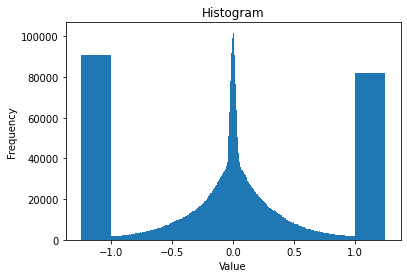

In [15]:
# Create the histogram
plt.hist(new_bins[:-1], new_bins, weights=bin_counts)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

In [ ]:
# plt.hist(bin_counts, bins = 258)
# plt.show()